In [1]:
#Gọi thư viện:
import numpy as np
from keras.utils import np_utils 
from keras.datasets import fashion_mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
from keras.backend import dropout

4431872/4422102 [==============================] - 0s 0us/step


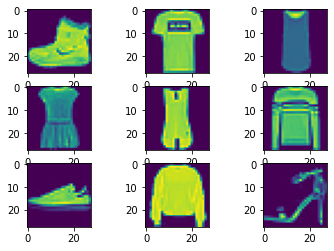

In [2]:
# Hiển thị fashion_mnist và chia dữ liệu thành 2 tập train và test:
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [5]:
# Xem kích thước tập dữ liệu train, test:
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [6]:
# Chuyển chiều dữ liệu 
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
# Ép kiểu dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Chuẩn hóa dữ liệu
x_train /=255
x_test /=255
# Chuyển y sang 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
# Tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Chạy mẫu thử
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=30,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/30
375/375 [==============================] - 10s 22ms/step - loss: 0.5921 - accuracy: 0.7838 - val_loss: 0.4452 - val_accuracy: 0.8373
Epoch 2/30
375/375 [==============================] - 8s 21ms/step - loss: 0.4153 - accuracy: 0.8479 - val_loss: 0.3599 - val_accuracy: 0.8687
Epoch 3/30
375/375 [==============================] - 8s 21ms/step - loss: 0.3768 - accuracy: 0.8628 - val_loss: 0.3624 - val_accuracy: 0.8679
Epoch 4/30
375/375 [==============================] - 11s 28ms/step - loss: 0.3519 - accuracy: 0.8734 - val_loss: 0.3870 - val_accuracy: 0.8712
Epoch 5/30
375/375 [==============================] - 8s 21ms/step - loss: 0.3386 - accuracy: 0.8754 - val_loss: 0.3514 - val_accuracy: 0.8744
Epoch 6/30
375/375 [==============================] - 8s 21ms/step - loss: 0.3270 - accuracy: 0.8822 - val_loss: 0.3533 - val_accuracy: 0.8764
Epoch 7/30
375/375 [==============================] - 8s 21ms/step - loss: 0.3177 - accuracy: 0.8836 - val_loss: 0.3489 - val_accuracy: 0.88

Sai số kiểm tra:  0.4854871928691864
Độ chính xác kiểm tra:  0.8884999752044678


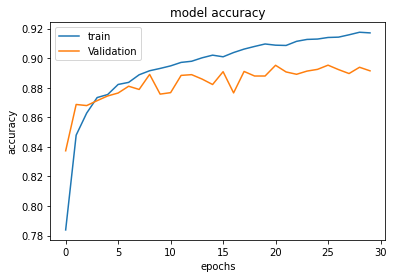

In [9]:
# Đánh giá chất lượng mô hình và đồ thị:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra: ',score[0])
print('Độ chính xác kiểm tra: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()